In [97]:
#importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

In [98]:
#importing files in pandas dataframe
train = pd.read_csv('train.csv',header=0)
test = pd.read_csv('test.csv',header = 0)
labels = train['label']
train.drop('label',axis=1, inplace =True)
#test shape =(28000,784), train shape =(42000,784), labels shape = (42000,1)

In [99]:
#Converting dataframes into numpy arrays
train = train.as_matrix()
test = test.as_matrix()
labels = labels.as_matrix()

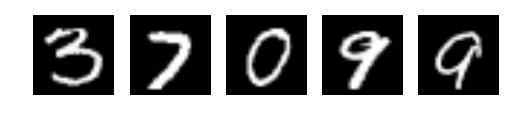

Labels: [3, 7, 0, 9, 9]


In [100]:
#Visualization of few random hand written digits
fig = plt.figure()
randLabels = []
for i in range(1,6):
    k = random.randrange(0,42000,10)
    ax = fig.add_subplot(1,5,i)
    ax.imshow(train[k,:].reshape(28,28),'gray')
    ax.axis('off')
    randLabels.append(labels[k])
plt.show()
print('Labels: {}'.format(randLabels))

In [101]:
#Splitting training dataset into cross-validation dataset(Using normal splitting instead of 5 fold cross validation)
train, valid, labels, validLabels = train_test_split(train, labels, test_size = 0.25, random_state=42)
#Checking sizes of training and validation datasets
print(np.shape(train))
print(np.shape(valid))
print(np.shape(labels))
print(np.shape(validLabels))

(31500, 784)
(10500, 784)
(31500,)
(10500,)


In [102]:
#PreProcessing(Data Compression)
pca = PCA()
pca.fit(train)
VarianceRatio = pca.explained_variance_ratio_

In [103]:
#Finding number of principal components
#Retaining 80% of total variance 
TotVar = 0 
for idx, Var in enumerate(VarianceRatio):
    TotVar += Var 
    if(TotVar>=0.80): 
        break 
print('Total Retained Variance: {}'.format(TotVar)) 
print('Number of principal components {}'.format(idx))

Total Retained Variance: 0.800694921158514
Number of principal components 42


In [104]:
#Again fitting pca for 153 principal components
pcaRed = PCA(n_components = 42)
pcaRed.fit(train)
#Compressing training and testing data using fitted data
train = pcaRed.fit_transform(train)
test = pcaRed.fit_transform(test)
valid = pcaRed.fit_transform(valid)

In [105]:
#PreProcessing data
scaler = preprocessing.StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)
valid = scaler.transform(valid)

In [96]:
#Trying SVM classifier
#Increasing C and Gamma as on decreasing accuracy is not increasing, hence high bias
# clf =SVC(C =60, gamma = 0.001, kernel ='rbf')
# t0 = time.time()
# clf.fit(train, labels)
# TrainPred = clf.predict(train)
# TrainScore = accuracy_score(labels,TrainPred)
# ValidPred = clf.predict(valid)
# ValidScore = accuracy_score(validLabels,ValidPred)
# t1 = time.time()
# print('Training and cross-validation accuracy are : {} and {}'.format(TrainScore, ValidScore ))
# print('Total training and cross-validation accuracy calculation time: {}'.format(np.abs(t1-t0)))

Training and cross-validation accuracy are : 0.9715555555555555 and 0.3302857142857143
Total training and cross-validation accuracy calculation time: 88.84572148323059


In [106]:
#Grid Search 
clf = SVC(kernel = 'rbf')
combined = np.concatenate((train,valid), axis =0)
combinedLabels = np.concatenate((labels, validLabels), axis=0)
cv = ShuffleSplit(n_splits=1, test_size=.30, random_state=42)
parameter_grid = {
                 'C' : np.linspace(55,100,10),
                 'gamma': np.linspace(0.001,0.07,20)
                 }
grid_search = GridSearchCV(clf, param_grid=parameter_grid, cv=cv)
grid_search.fit(combined, combinedLabels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9705555555555555
Best parameters: {'gamma': 0.037315789473684219, 'C': 55.0}


In [110]:
#using classifier to predict test images on public leader board
# First creating classifier for full training set
clf = SVC(kernel = 'rbf', C = 55.0, gamma = 0.037315789473684219)
clf.fit(combined, combinedLabels)
pred = clf.predict(test)
dfPred = pd.read_csv('sample_submission.csv',header=0)
dfPred['Label']= pd.DataFrame(pred)
dfPred.to_csv('mySubmission.csv', index=False)